<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P2_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 2**

## **Langkah 1**

In [1]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **LANGKAH 2: UNDUH & NORMALISASI DATA**

In [2]:
print("Sedang memuat dataset CIFAR-10...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel agar berada di antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(f"Jumlah Data Training: {train_images.shape[0]}")
print(f"Jumlah Data Testing : {test_images.shape[0]}")

Sedang memuat dataset CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Jumlah Data Training: 50000
Jumlah Data Testing : 10000


## **LANGKAH 3: VERIFIKASI DATA (VISUALISASI)**

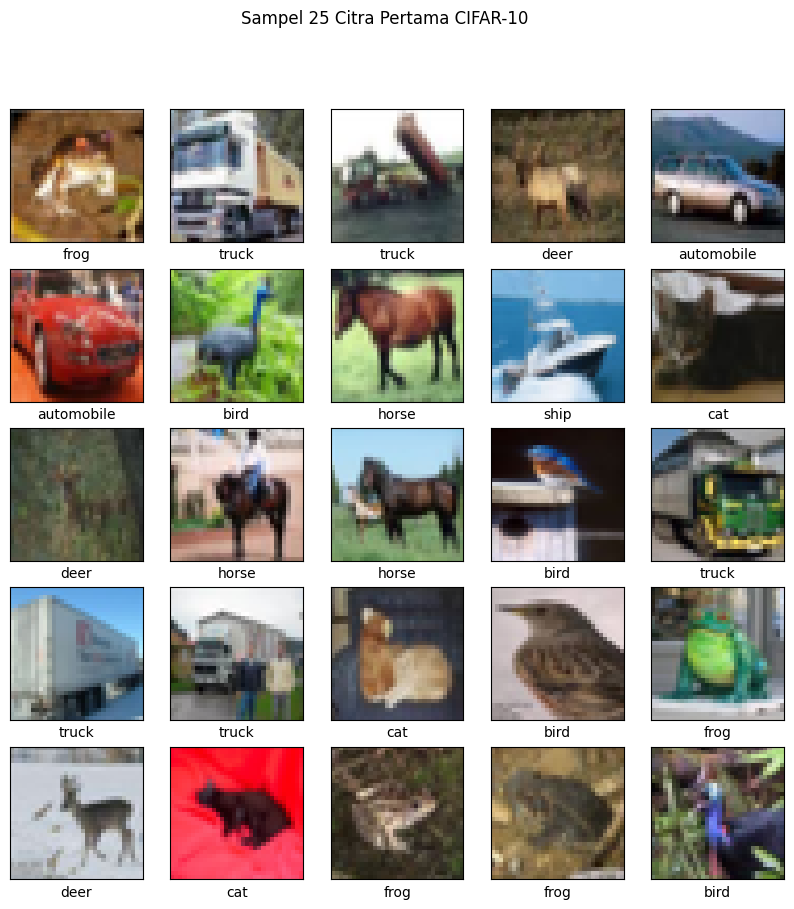

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Label CIFAR berbentuk array, perlu indeks ekstra [0]
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sampel 25 Citra Pertama CIFAR-10")
plt.show()

Output ini menampilkan grid 5x5 yang berisi 25 citra pertama dari dataset training CIFAR-10 beserta label kelasnya (seperti frog, truck, deer). Tampilan ini berfungsi untuk memverifikasi bahwa dataset telah dimuat dengan benar, label sesuai dengan gambarnya, dan format piksel sudah siap untuk diproses.

## **LANGKAH 4: BUAT MODEL CNN**

In [4]:
model = models.Sequential()

# Feature Extraction Layer (Konvolusi & Pooling)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layer (Klasifikasi)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output layer 10 kelas

# Cek Arsitektur
print("\n--- Arsitektur Model CNN ---")
model.summary()

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


--- Arsitektur Model CNN ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

* Layer: Menunjukkan urutan lapisan (Conv2D -> MaxPool -> Conv2D...).

* Output Shape: Menunjukkan perubahan dimensi data saat melewati setiap lapisan. Terlihat dimensi spasial (tinggi x lebar) mengecil dari 32x32 menjadi 4x4, sementara kedalaman (channel) bertambah dari 3 menjadi 64.

* Param #: Jumlah parameter (bobot) yang akan dilatih pada setiap lapisan.

## **LANGKAH 5: FIT MODEL (TRAINING)**

In [5]:
print("\n--- Mulai Proses Training ---")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


--- Mulai Proses Training ---
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.3550 - loss: 1.7467 - val_accuracy: 0.5440 - val_loss: 1.2897
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5710 - loss: 1.2061 - val_accuracy: 0.6126 - val_loss: 1.0780
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6335 - loss: 1.0296 - val_accuracy: 0.6380 - val_loss: 1.0184
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6721 - loss: 0.9413 - val_accuracy: 0.6762 - val_loss: 0.9243
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7009 - loss: 0.8539 - val_accuracy: 0.6810 - val_loss: 0.9093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7203 - loss: 0.7983 - val_accuracy: 0.6880 - val_loss: 0.9029
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 42ms/step - accuracy: 0.7398 - loss: 0.7495 - val_accuracy: 0.6933 - val_loss: 0.8874
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s

## **LANGKAH 6 & 7: EVALUASI & AKURASI**

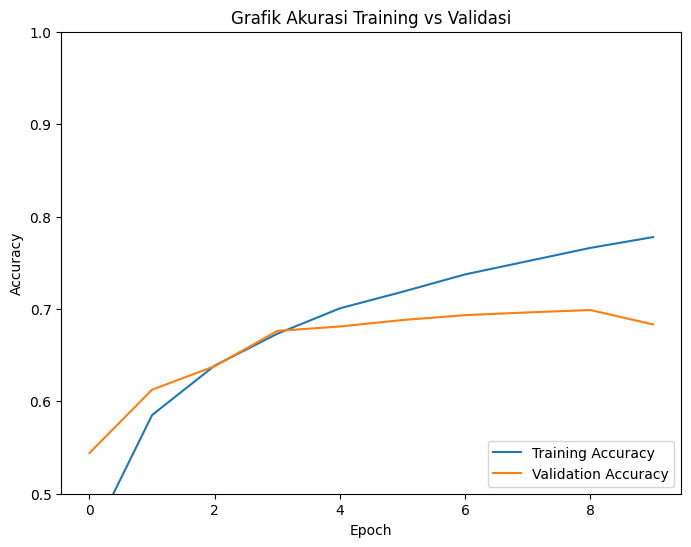


--- Evaluasi pada Data Testing ---
313/313 - 5s - 15ms/step - accuracy: 0.6832 - loss: 0.9499
Akurasi Akhir: 0.6832


In [6]:
# Plot Akurasi
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Grafik Akurasi Training vs Validasi")
plt.show()

# Evaluasi Akurasi Akhir
print("\n--- Evaluasi pada Data Testing ---")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Akurasi Akhir: {test_acc:.4f}")

Nilai test_acc 0.6832 menunjukkan performa akhir model dalam mengklasifikasikan 10.000 gambar pada dataset pengujian.